# Librerias

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('dark_background')



# Análisis de Fourier

In [3]:
pd.read_csv('Stars 2022-05-29 21_45.csv')

,id,star_id,hjd,camera,mag,mag_err,flux,flux_err,created_at,updated_at
0,0676348c-34aa-5fae-b318-2af01cd8c7b5,bd178638-277e-5285-bd32-c3f9a12adab8,2.457603e+06,bb,14.496,0.02963,6.103,0.166,2019-04-16 16:31:51 UTC,2019-04-16 16:31:51 UTC
1,07e4ee75-7407-5c07-bfe6-3a57a4f24199,bd178638-277e-5285-bd32-c3f9a12adab8,2.457610e+06,bb,13.722,0.02233,12.454,0.256,2019-04-16 16:32:04 UTC,2019-04-16 16:32:04 UTC
2,0a30a2da-c2fe-5aa8-a2bf-a21b58327b3c,bd178638-277e-5285-bd32-c3f9a12adab8,2.457939e+06,bb,15.028,0.04104,3.738,0.141,2019-04-16 16:32:01 UTC,2019-04-16 16:32:01 UTC
3,0b2fae8b-7f5c-51cf-b5e2-2210a57bd5b4,bd178638-277e-5285-bd32-c3f9a12adab8,2.457738e+06,bb,16.590,0.12086,0.887,0.099,2019-04-16 16:31:50 UTC,2019-04-16 16:31:50 UTC
4,0e8134b1-2b60-5b22-8f47-151d922a4972,bd178638-277e-5285-bd32-c3f9a12adab8,2.457532e+06,bb,16.370,99.99000,0.920,0.217,2019-04-16 16:31:50 UTC,2019-04-16 16:31:50 UTC
...,...,...,...,...,...,...,...,...,...,...
101,f7647968-c80a-5163-a514-581e42d1a069,bd178638-277e-5285-bd32-c3f9a12adab8,2.458009e+06,bb,16.777,99.99000,0.455,0.149,2019-04-16 16:31:41 UTC,2019-04-16 16:31:41 UTC
102,f859cd39-ddac-55fb-9331-93db3426eaf5,bd178638-277e-5285-bd32-c3f9a12adab8,2.457386e+06,bb,12.106,0.02000,55.131,1.014,2019-04-16 16:31:49 UTC,2019-04-16 16:31:49 UTC
103,f85fbeea-5d38-5940-b86c-f3f8210af545,bd178638-277e-5285-bd32-c3f9a12adab8,2.457617e+06,bb,13.329,0.02198,17.883,0.362,2019-04-16 16:31:39 UTC,2019-04-16 16:31:39 UTC
104,f868a00e-3775-5c69-a668-20a4b0270f64,bd178638-277e-5285-bd32-c3f9a12adab8,2.457990e+06,bb,16.784,99.99000,0.443,0.148,2019-04-16 16:31:50 UTC,2019-04-16 16:31:50 UTC


In [4]:
pd.read_csv('Stars 2022-05-29 21_50.csv').keys()

Index(['id', 'star_id', 'hjd', 'camera', 'mag', 'mag_err', 'flux', 'flux_err',
       'created_at', 'updated_at'],
      dtype='object')

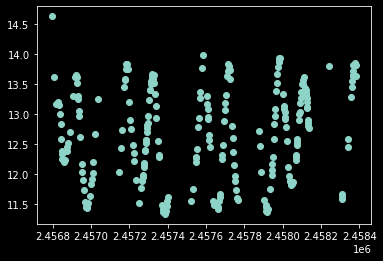

In [5]:

datos = pd.read_csv('Stars 2022-05-30 03_37.csv')
datos2 = pd.read_csv('Stars 2022-05-30 03_37.csv')
plt.scatter(datos['hjd'],datos['mag'])
plt.show()

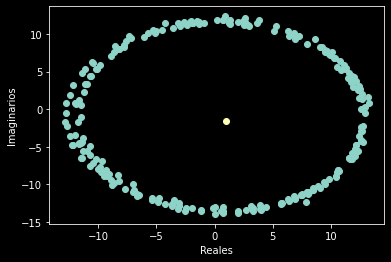

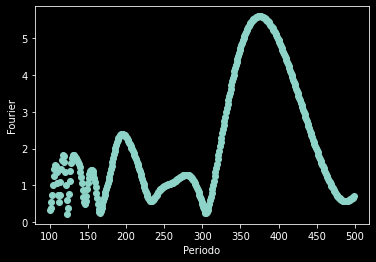

[131, 195, 253, 279, 375]


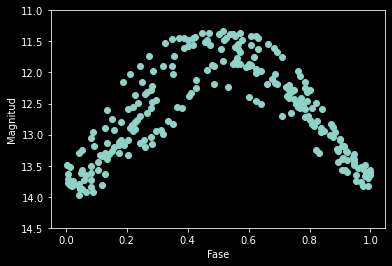

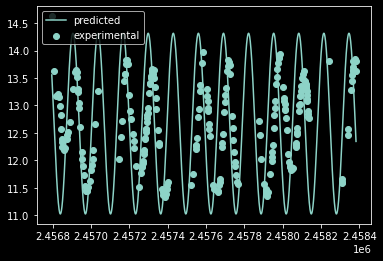

In [13]:

import Algoritmosnumericos as alg
dataMag= datos["mag"]
dataTime= datos["hjd"]

pointReal = []
pointImag = []


#Calcula la transformada discreta (un número complejo) de un periodo dado 

def discret_Fourier_Transform(w, mag, time):

    
    sumatory = 0; 
   
    for i in range(0, len(time), 1):

        nTerm = mag[i]*np.exp((-1*1j*2*np.pi*time[i])/w)
        pointReal.append(nTerm.real)
        pointImag.append(nTerm.imag)

        sumatory += nTerm

    sumatory = sumatory/len(time)
    return sumatory 


center_mass = discret_Fourier_Transform(131,dataMag,dataTime)


plt.scatter(pointReal , pointImag)
plt.xlabel("Reales")
plt.ylabel("Imaginarios")
plt.scatter(center_mass.real,center_mass.imag )
plt.show()



def multiplesPeriodosFourier(inicio, fin, paso, magnitude, time):

    periods = np.arange(inicio,fin,paso)
    FourierFrequencies = []

    for w in periods:
        r = discret_Fourier_Transform(w,magnitude,time)
        real_r = np.absolute(r)
        FourierFrequencies.append(real_r)
    
    return periods.tolist(),FourierFrequencies

result = multiplesPeriodosFourier(100, 500, 1, dataMag, dataTime)
fig2 = plt.figure()

plt.scatter(result[0] , result[1])
plt.xlabel("Periodo")
plt.ylabel("Fourier")
plt.show()


def discriminar(x,y):
    for i in x:
        if abs((i-y)/y)<0.1:
            z=False
            return x
    return x.append(y)

def optimizacion(xValues, yValues):

    listaDerivadas = alg.lista_derivada_numerica1(xValues, yValues)



    dictDiccionario = {}
    i = 0 


    for der in listaDerivadas: 
        dictDiccionario[der] = i

        i += 1

    listaDerivadas=abs(np.array(listaDerivadas)).tolist()
    listaDerivadas.sort(reverse=False)
    listaSegundasDerivadas = alg.lista_segunda_derivada_numerica1(xValues, yValues)
    count=0
    best=[]
    aux=None
    aux2=None
    for i in range(len(listaDerivadas)):
        try:
            if  listaSegundasDerivadas[dictDiccionario[listaDerivadas[i]] ]<0:
                aux=dictDiccionario[listaDerivadas[i]]
                aux2=len(best)
                discriminar(best,xValues[aux])
                if aux2!=len(best):
                    count+=1
                    if count==5:
                        break
        except:
            if  listaSegundasDerivadas[dictDiccionario[-1*listaDerivadas[i]] ]<0:
                aux=dictDiccionario[-1*listaDerivadas[i]]
                aux2=len(best)
                discriminar(best,xValues[aux])
                if aux2!=len(best):
                    count+=1
                    if count==5:
                        break
    best.sort(reverse=False)  
    return best








optm=optimizacion(result[0],result[1])
print(optm)

sPeriod = optm[0]

p= sPeriod
phase = np.mod((datos['hjd']-min(datos['hjd'])), p)/p
fig3 = plt.figure()
plt.scatter(phase,datos['mag'])
plt.ylim([14.5,11])
plt.xlabel("Fase")
plt.ylabel("Magnitud")

plt.show()




predicted = []


amplitude = (abs(np.array(datos["mag"].tolist()).mean()-abs(max(datos["mag"])))+abs(
            np.array(datos["mag"].tolist()).mean()-abs(min(datos["mag"]))))*(1/2)



timeRange = np.arange(min(dataTime), max(dataTime), 1)



if -1<dataMag[0]- dataMag.mean()/amplitude <1:
    epsilon=np.arcsin( dataMag[0]- dataMag.mean()/amplitude)

    
else:
    if dataMag[0]-dataMag.mean()>0:
        epsilon = -2*np.pi/4*sPeriod
        
    else:
        epsilon = 2*np.pi/4*sPeriod




for t in timeRange: 

    function = amplitude*np.sin((2*np.pi*t/sPeriod)+epsilon)+dataMag.mean()
    predicted.append(function)

fig4 = plt.figure()
plt.plot(timeRange,predicted, label="predicted")
plt.scatter(datos['hjd'],datos['mag'], label="experimental")
plt.legend()
plt.show()


